In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("housing.csv")
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.median_income.value_counts()

3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: median_income, Length: 12928, dtype: int64

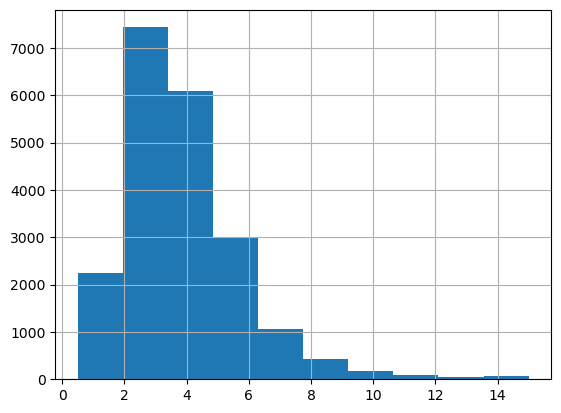

In [4]:
df.median_income.hist();

[pandas.cut()](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) is used to bin values into discrete intervals.
*** Since the distribution is not distributed evenly, we want to use the pd.cut() to create even bins,  *** np.info is taking the everything above 6 to be grouped into one

In [5]:
df["income_cat"] = pd.cut(df.median_income, bins = [0.0, 1.5, 3.0, 4.5, 6.0, np.inf], labels = [1,2,3,4,5])

In [6]:
df["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

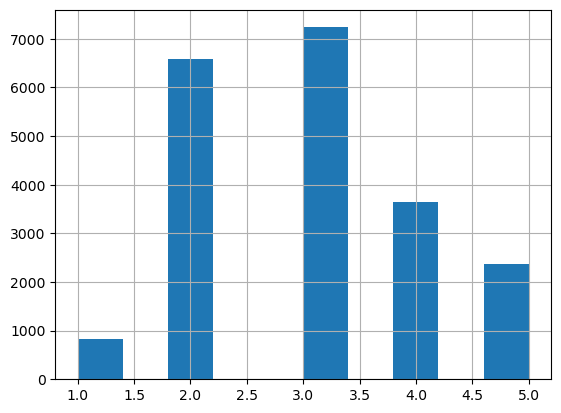

In [7]:
df["income_cat"].hist();

# 2. StratifiedShuffleSplit() 

[StratifiedShuffleSplit()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) provides train/test indices to split data in train/test sets.  `strat_train_set` and `strat_test_set` are both Pandas DataFrames that are added to upon each iteration of the for loop. The `split()` method of the `StratifiedShuffleSplit` class generates indices to split the data into a training and test set.

In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_object = StratifiedShuffleSplit(n_splits = 1, test_size = .2, random_state = 42 )

for train_index, test_index in stratified_object.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

### Now, that we have split the train and test data set, we can delete the pd_cut column created used to split the data because it is not part of the original data set

In [9]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [13]:
print(strat_train_set.shape)
strat_train_set.head()

(16512, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


## Use the stratified train set to to play around and visualize

In [15]:
print(strat_test_set.shape)
strat_test_set.head()

(4128, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


If you want to play around with the data inside a Pandas Dataframe without corrupting that data, then you must make a copy of it using the [copy() method](https://stackoverflow.com/questions/27673231/why-should-i-make-a-copy-of-a-data-frame-in-pandas#:~:text=6%20Answers&text=Because%20if%20you%20don't,dataFrame%20to%20a%20different%20name.&text=It's%20necessary%20to%20mention%20that,depends%20on%20kind%20of%20indexing.&text=The%20rules%20about%20when%20a,are%20entirely%20dependent%20on%20NumPy.).

In [11]:
housing = strat_train_set.copy()

# Prepare the data for Machine Learning algorithms
##  SEPARATE the prediction label "Median_House_Value"from the training set

In [16]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_train_label = strat_train_set.median_house_value.copy()

## Data Cleaning

In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


# MISSING VALUES - isnull()
### Total_bedrooms is the only column with missing data

In [18]:
sum(housing.isnull().any(axis=1))

158

In [22]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)]

print(sample_incomplete_rows.shape)
sample_incomplete_rows

(158, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,NEAR OCEAN


Note that the [dropna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html), [drop()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html), and [fillna()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) methods only return a DataFrame with the specified operations performed and do not change the state of the host object, unless the "inplace" parameter is set to "True".
### # option 1 - Drop all observations with missing data -->  dropna()
### # option 2 - Drop the entire feature that has missing data   ----> drop()
### # option 3 - Set a specific value for missing values ---> fillna()

#### option 1 - Drop all observations with missing data --> dropna()

In [23]:
sample_incomplete_rows.dropna(subset=['total_bedrooms'], inplace = False)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


#### option 2 - Drop the entire feature that has missing data ----> drop()

In [24]:
sample_incomplete_rows.drop('total_bedrooms', axis = 1, inplace = False)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,3477.0,1537.0,3.0546,NEAR OCEAN


### option 3 - Set a specific value for missing values ---> fillna()

In [25]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows.total_bedrooms.fillna(median, inplace=True)
sample_incomplete_rows

/var/folders/j3/6c9zctcs6m3_2rx68drm3mg80000gn/T/ipykernel_1879/1011260525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_incomplete_rows.total_bedrooms.fillna(median, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,433.0,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,433.0,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,433.0,3477.0,1537.0,3.0546,NEAR OCEAN


### Use Scikit_Learn SimpleImputer to replace missing data with desired calculation
We can use Scikit-Learn's [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) class, which is an imputation transformer that is used for filling-in missing values. Imputation is the process of replacing missing data with substituted values.
#### STEPS to use SimpleImputer
1. imputer = SimpleImputer(strategy = 'median') --> Instianiate the SimpleImputer with the desired strategy... 'median','mean',“most_frequent”, “constant” - replace missing values with fill_value. Can be used with strings or numeric data.
##### 1a. imputer.strategy ----> see what strategy is selected
2. imputer.fit(housing_num) --> calculates the median value for each feature
#### 2a. imputer.statistics_  ----> see what the results are of the calculation from the fit step
3. X = imputer.transform(housing_num)  ---> Apply the imputer to the dataframe returning just arrays, not DF
4. housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing.index) --> convert back to DF

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [28]:
imputer.strategy

'median'

We must remove the text attribute because the [median()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html) method of the DataFrame class can only be calculated on numerical attributes.

In [29]:
housing_num = housing.drop("ocean_proximity", axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [30]:
# calculates the median value for each feature
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [31]:
# can see what the imputed values are for each column calculated
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [32]:
# compare to see the SimpleImputer just did what we would calculate with .median() for our df
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Now we are ready to transform the training set:

In [33]:
# Applies the selected strategy to the desired DF but returns an array instead of a dataframe
X = imputer.transform(housing_num)

In [34]:
# Convert the transfored data with the median to a DF to use for the ML model
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [35]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580
...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,433.0,3207.0,1012.0,4.0767
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667
9149,-118.50,34.46,17.0,10267.0,433.0,4956.0,1483.0,5.5061
16757,-122.48,37.70,33.0,4492.0,433.0,3477.0,1537.0,3.0546


## Handling Text and Categorical Attributes

For df[[colname(s)]], the interior brackets are for list, and the outside brackets are indexing operator, i.e. you must use double brackets if you select two or more columns. With one column name, single pair of brackets returns a Series, while double brackets return a dataframe.

In [36]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


The [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) class is used to encode categorical features as a sequence of consequtive integers from 0 to n-1.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_encoded[:10]

In [ ]:
ordinal_encoder.categories_

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes. Scikit-Learn provides a [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) class to convert categorical values into one-hot vectors:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

### ENTER CODE HERE ###
housing_cat_1hot

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [ ]:
housing_cat_1hot.toarray()

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [ ]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

In [ ]:
cat_encoder.categories_